In [3]:
import random
random.seed(0)

import numpy as np
np.random.seed(0)

import tensorflow as tf
tf.random.set_seed(0)


In [4]:
import os
import json
from zipfile import ZipFile
from PIL import Image

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models

In [2]:
!pip install kaggle



In [5]:
kaggle_credentails = json.load(open("kaggle.json"))
os.environ['KAGGLE_USERNAME'] = kaggle_credentails["username"]
os.environ['KAGGLE_KEY'] = kaggle_credentails["key"]

In [6]:
!kaggle datasets download -d abdallahalidev/plantvillage-dataset

Dataset URL: https://www.kaggle.com/datasets/abdallahalidev/plantvillage-dataset
License(s): CC-BY-NC-SA-4.0
plantvillage-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [7]:
!ls


 class_indices.json	 plantvillage-dataset.zip   test_blueberry_healthy.jpg
 kaggle.json		 sample_data		    test_potato_early_blight.jpg
'plantvillage dataset'	 test_apple_black_rot.jpg


In [8]:
with ZipFile("plantvillage-dataset.zip", 'r') as zip_ref:
    zip_ref.extractall()

In [9]:
print(os.listdir("plantvillage dataset"))


print(len(os.listdir("plantvillage dataset/segmented")))
print(os.listdir("plantvillage dataset/segmented")[:5])

print(len(os.listdir("plantvillage dataset/color")))
print(os.listdir("plantvillage dataset/color")[:5])

print(len(os.listdir("plantvillage dataset/grayscale")))
print(os.listdir("plantvillage dataset/grayscale")[:5])

['color', 'segmented', 'grayscale']
38
['Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Orange___Haunglongbing_(Citrus_greening)']
38
['Apple___Cedar_apple_rust', 'Tomato___Tomato_Yellow_Leaf_Curl_Virus', 'Tomato___healthy', 'Corn_(maize)___Northern_Leaf_Blight', 'Orange___Haunglongbing_(Citrus_greening)']


In [10]:
print(len(os.listdir("plantvillage dataset/color/Grape___healthy")))
print(os.listdir("plantvillage dataset/color/Grape___healthy")[:5])

423
['98483d5a-cdee-4a61-9cb3-03913dbaa850___Mt.N.V_HL 9116.JPG', 'd68b653c-4fe7-49ee-80d4-1f0c84092242___Mt.N.V_HL 6077.JPG', 'c7eee9a0-9a46-448f-a59a-9385132c979b___Mt.N.V_HL 9075.JPG', '215c8317-c0ca-4b35-9ac2-28e01712e367___Mt.N.V_HL 8914.JPG', 'e1520328-8fdd-42a9-bd49-95721a89078c___Mt.N.V_HL 6125.JPG']


In [11]:
base_dir = 'plantvillage dataset/color'

(256, 256, 3)


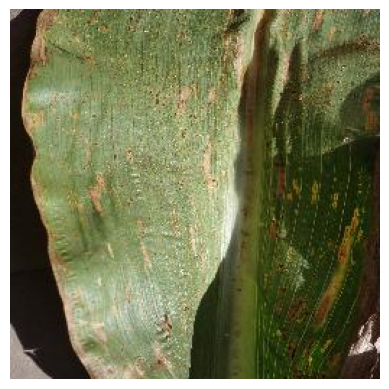

In [12]:
image_path = '/content/plantvillage dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00120a18-ff90-46e4-92fb-2b7a10345bd3___RS_GLSp 9357.JPG'
# Read the image
img = mpimg.imread(image_path)

print(img.shape)
# Display the image
plt.imshow(img)
plt.axis('off')  # Turn off axis numbers
plt.show()

In [13]:
image_path = '/content/plantvillage dataset/color/Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot/00120a18-ff90-46e4-92fb-2b7a10345bd3___RS_GLSp 9357.JPG'

# Read the image
img = mpimg.imread(image_path)

print(img)

[[[147 130 123]
  [126 109 102]
  [149 132 125]
  ...
  [ 89 104  73]
  [ 82 101  73]
  [ 94 114  86]]

 [[145 128 121]
  [169 152 145]
  [139 122 115]
  ...
  [ 85 100  71]
  [ 61  80  52]
  [107 127  99]]

 [[122 107 100]
  [145 130 123]
  [156 141 136]
  ...
  [ 88 104  75]
  [116 135 107]
  [ 71  91  63]]

 ...

 [[153 140 132]
  [170 157 149]
  [177 164 156]
  ...
  [ 39  22  14]
  [ 40  23  15]
  [ 38  21  13]]

 [[161 148 140]
  [167 154 146]
  [170 157 149]
  ...
  [ 37  20  12]
  [ 37  20  12]
  [ 46  29  21]]

 [[171 158 150]
  [162 149 141]
  [160 147 139]
  ...
  [ 39  22  14]
  [ 29  12   4]
  [ 43  26  18]]]


In [21]:
img_size = 246
batch_size = 210

In [15]:
data_gen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # Use 20% of data for validation
)

In [16]:
train_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='training',
    class_mode='categorical'
)

Found 43456 images belonging to 38 classes.


In [17]:
validation_generator = data_gen.flow_from_directory(
    base_dir,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    subset='validation',
    class_mode='categorical'
)

Found 10849 images belonging to 38 classes.


In [18]:
model = models.Sequential()

model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_size, img_size, 3)))

model.add(layers.MaxPooling2D(2, 2))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D(2, 2))


model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(train_generator.num_classes, activation='softmax'))

In [24]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 127, 127, 32)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 64)      18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 62, 62, 64)        0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 246016)            0         
                                                                 
 dense (Dense)               (None, 256)               6

In [22]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
)

In [23]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // batch_size,  # Number of steps per epoch
    epochs=1,  # Number of epochs
    validation_data=validation_generator,
    validation_steps=validation_generator.samples // batch_size  # Validation steps
)

206/206 [==============================] - 4983s 24s/step - loss: 1.1477 - accuracy: 0.6796 - val_loss: 0.5960 - val_accuracy: 0.8202


In [24]:
print("Evaluating model...")
val_loss, val_accuracy = model.evaluate(validation_generator, steps=validation_generator.samples // batch_size)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

Evaluating model...
51/51 [==============================] - 334s 7s/step - loss: 0.5964 - accuracy: 0.8211
Validation Accuracy: 82.11%


In [25]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

# Predict labels for the validation set
y_pred_prob = model.predict(validation_generator)
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert predicted probabilities to class labels

# Get ground truth labels
y_true = validation_generator.classes

# Compute precision, recall, and F1 score
precision, recall, f1_score, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted',zero_division=1)

# Compute accuracy
accuracy = accuracy_score(y_true, y_pred)

# Print precision, recall, accuracy, and F1 score
print("Precision:", precision)
print("Recall:", recall)
print("Accuracy:", accuracy)
print("F1 Score:", f1_score)

55/55 [==============================] - 349s 6s/step
Precision: 0.04475814308024229
Recall: 0.045073278643192924
Accuracy: 0.045073278643192924
F1 Score: 0.04454445934116645


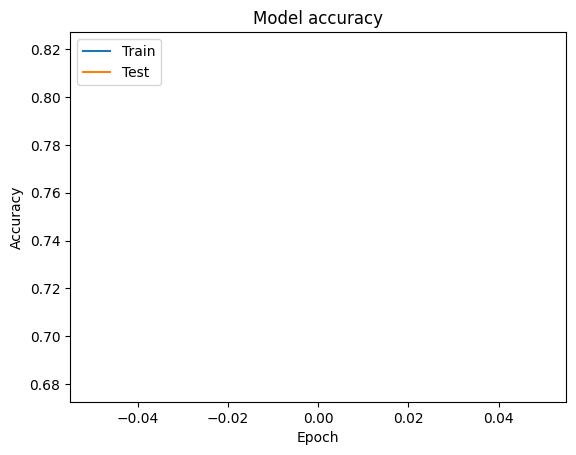

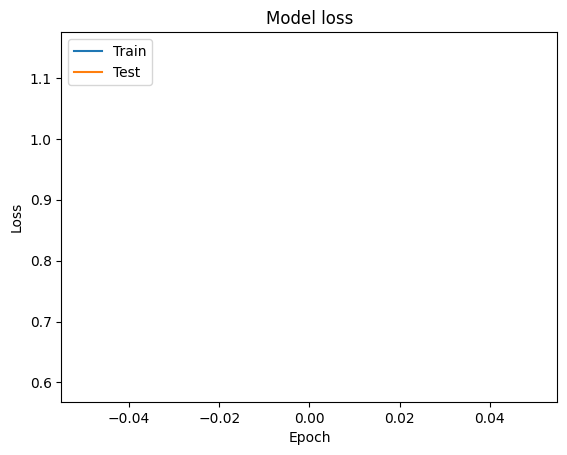

In [26]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [36]:
def load_and_preprocess_image(image_path1, target_size=(256, 256)):
    # Load the image
    img = Image.open(image_path1)
    # Resize the image
    img = img.resize(target_size)
    # Convert the image to a numpy array
    img_array = np.array(img)
    # Add batch dimension
    img_array = np.expand_dims(img_array, axis=0)
    # Scale the image values to [0, 1]
    img_array = img_array.astype('float32') / 255.
    return img_array

# Function to Predict the Class of an Image
def predict_image_class(model, image_path1, class_indices):
    preprocessed_img = load_and_preprocess_image(image_path1)
    predictions = model.predict(preprocessed_img)
    predicted_class_index = np.argmax(predictions, axis=1)[0]
    predicted_class_name = class_indices[predicted_class_index]
    return predicted_class_name

In [28]:
class_indices = {v: k for k, v in train_generator.class_indices.items()}

In [29]:
class_indices


{0: 'Apple___Apple_scab',
 1: 'Apple___Black_rot',
 2: 'Apple___Cedar_apple_rust',
 3: 'Apple___healthy',
 4: 'Blueberry___healthy',
 5: 'Cherry_(including_sour)___Powdery_mildew',
 6: 'Cherry_(including_sour)___healthy',
 7: 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 8: 'Corn_(maize)___Common_rust_',
 9: 'Corn_(maize)___Northern_Leaf_Blight',
 10: 'Corn_(maize)___healthy',
 11: 'Grape___Black_rot',
 12: 'Grape___Esca_(Black_Measles)',
 13: 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 14: 'Grape___healthy',
 15: 'Orange___Haunglongbing_(Citrus_greening)',
 16: 'Peach___Bacterial_spot',
 17: 'Peach___healthy',
 18: 'Pepper,_bell___Bacterial_spot',
 19: 'Pepper,_bell___healthy',
 20: 'Potato___Early_blight',
 21: 'Potato___Late_blight',
 22: 'Potato___healthy',
 23: 'Raspberry___healthy',
 24: 'Soybean___healthy',
 25: 'Squash___Powdery_mildew',
 26: 'Strawberry___Leaf_scorch',
 27: 'Strawberry___healthy',
 28: 'Tomato___Bacterial_spot',
 29: 'Tomato___Early_blight',
 30: '

In [34]:
json.dump(class_indices, open('class_indices.json', 'w'))

In [38]:
image_path1 = '/content/test_apple_black_rot.jpg'
#image_path = '/content/test_blueberry_healthy.jpg'
#image_path = '/content/test_potato_early_blight.jpg'
predicted_class_name = predict_image_class(model, image_path1, class_indices)

# Output the result
print("Predicted Class Name:", predicted_class_name)

1/1 [==============================] - 0s 227ms/step
Predicted Class Name: Apple___Black_rot
